In [80]:
import torch
import matplotlib.pyplot as plt
import os
import pickle
import numpy as np
import seaborn as sns
import matplotlib.patches as mpatches

## [#e60049", "#0bb4ff", "#50e991", "#e6d800", "#9b19f5", "#ffa300", "#dc0ab4", "#b3d4ff", "#00bfa0"]
colors = ["#e60049", "#0bb4ff", "#50e991", "#e6d800", "#9b19f5", "#ffa300", "#dc0ab4", "#b3d4ff", "#00bfa0"]

In [81]:
beta = 0.9
num_steps = 60
batch_size = 64
v_thr_train = 0.5
# Load data from the pickle file for sparsity vs threshold
with open(r'Experiment_NMNIST\Plots\Plot_data\FT_spars_vs_thr_beta0.9_num_steps30_trainedthr_8.0_compare.pkl', 'rb') as f:
    data = pickle.load(f)
    v_thrs = data['thresholds']
    L1_1_sparss = data['L1_1_sparss']
    L1_2_sparss = data['L1_2_sparss']
    L1_3_sparss = data['L1_3_sparss']
    L2_1_sparss = data['L2_1_sparss']
    L2_2_sparss = data['L2_2_sparss']
    L2_3_sparss = data['L2_3_sparss']
    L3_1_sparss = data['L3_1_sparss']
    L3_2_sparss = data['L3_2_sparss']
    L3_3_sparss = data['L3_3_sparss']

# Load data from the pickle file for accuracy vs threshold
with open(r'Experiment_NMNIST\Plots\Plot_data\FT_acc_vs_thr_beta0.9_num_steps30_trainedthr_8.0_compare.pkl', 'rb') as f:
    data = pickle.load(f)

    print(data.keys())
    accs = data['accs']
    accs2 = data['accs2']
    accs3 = data['accs3']
    briers = data['briers']
    briers2 = data['briers2']
    briers3 = data['briers3']
    briers_sm = data['briers_sm']
    briers2_sm = data['briers2_sm']
    briers3_sm = data['briers3_sm']


dict_keys(['thresholds', 'accs', 'accs2', 'accs3', 'briers', 'briers2', 'briers3', 'briers_sm', 'briers2_sm', 'briers3_sm'])


In [82]:

# Load data from the pickle file for sparsity vs threshold
with open(r'Experiment_NMNIST\Plots\Plot_data\FT_spars_vs_thr_beta0.9_num_steps30_trainedthr_11.0_compare_extra.pkl', 'rb') as f:
    data = pickle.load(f)
    v_thrs = data['thresholds']
    L1_1_sparss += (data['L1_1_sparss'])
    L1_2_sparss += (data['L1_2_sparss'])
    L1_3_sparss += (data['L1_3_sparss'])
    L2_1_sparss += (data['L2_1_sparss'])
    L2_2_sparss += (data['L2_2_sparss'])
    L2_3_sparss += (data['L2_3_sparss'])
    L3_1_sparss += (data['L3_1_sparss'])
    L3_2_sparss += (data['L3_2_sparss'])
    L3_3_sparss += (data['L3_3_sparss'])

# Load data from the pickle file for accuracy vs threshold
with open(r'Experiment_NMNIST\Plots\Plot_data\FT_acc_vs_thr_beta0.9_num_steps30_trainedthr_11.0_compare_extra.pkl', 'rb') as f:
    data = pickle.load(f)

    print(data.keys())
    accs += (data['accs'])
    accs2 += (data['accs2'])
    accs3 += (data['accs3'])
    briers += (data['briers'])
    briers2 += (data['briers2'])
    briers3 += (data['briers3'])
    briers_sm += (data['briers_sm'])
    briers2_sm += (data['briers2_sm'])
    briers3_sm += (data['briers3_sm'])

dict_keys(['thresholds', 'accs', 'accs2', 'accs3', 'briers', 'briers2', 'briers3', 'briers_sm', 'briers2_sm', 'briers3_sm'])


In [83]:
model_1_meanspars = torch.mean(torch.tensor([L1_1_sparss, L2_1_sparss, L3_1_sparss]), dim=0)
model_2_meanspars = torch.mean(torch.tensor([L1_2_sparss, L2_2_sparss, L3_2_sparss]), dim=0)
model_3_meanspars = torch.mean(torch.tensor([L1_3_sparss, L2_3_sparss, L3_3_sparss]), dim=0)

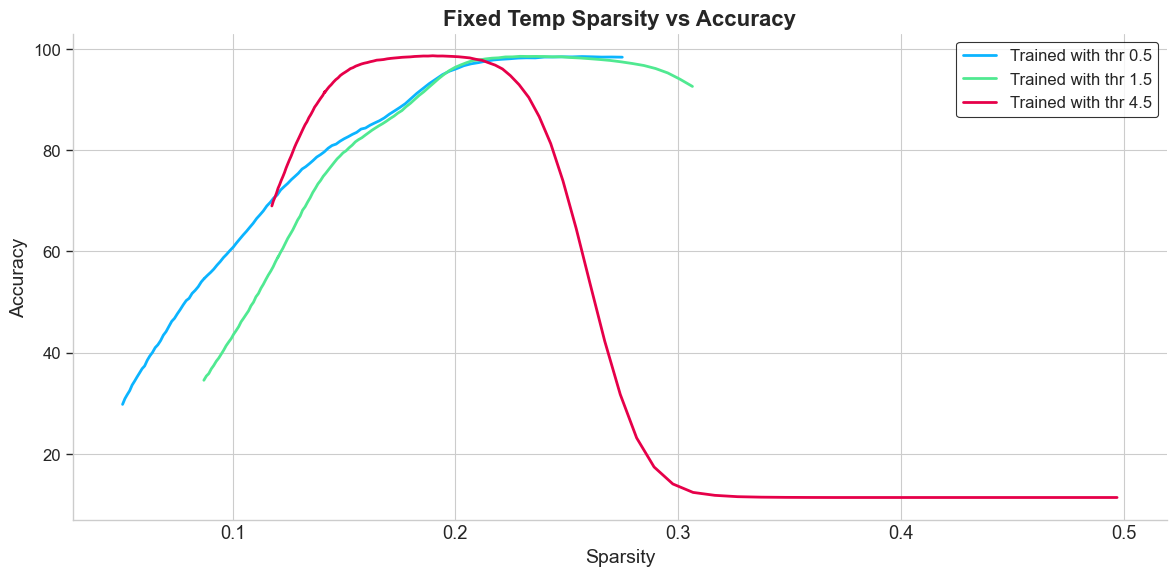

In [84]:
# Set the style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("paper", font_scale=1.5)

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(12, 6))


# Plot the data
ax.plot(model_1_meanspars, accs, color='#0bb4ff', linewidth=2, label='Trained with thr 0.5')
ax.plot(model_2_meanspars, accs2, color='#50e991', linewidth=2, label='Trained with thr 1.5')
ax.plot(model_3_meanspars, accs3, color='#e60049', linewidth=2, label='Trained with thr 4.5')

# Customize the plot
ax.set_xlabel('Sparsity', fontsize=14)
ax.set_ylabel('Accuracy', fontsize=14)
ax.legend(fontsize=12, frameon=True, facecolor='white', edgecolor='black')
ax.set_title('Fixed Temp Sparsity vs Accuracy', fontsize=16, fontweight='bold')

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Customize ticks
ax.tick_params(axis='x', which='both', length=0)
ax.tick_params(axis='y', which='major', labelsize=12)

# Adjust layout and show
plt.tight_layout()
plt.savefig('sparsity_vs_accuracy.pdf', dpi=600)
plt.savefig('sparsity_vs_accuracy.png', dpi=600)

plt.show()



In [85]:
with open(r'Experiment_NMNIST\Plots\Plot_data\FT_prob_Robustness_beta0.9_num_steps30_trainedthr_compare.pkl', 'rb') as f:
    data = pickle.load(f)
    probs = data['probs']
    accs_robust_FT = data['accs']
    accs2_robust_FT = data['accs2']
    accs3_robust_FT = data['accs3']
    briers_robust_FT = data['briers']
    briers2_robust_FT = data['briers2']
    briers3_robust_FT = data['briers3']
    briers_sm_robust_FT = data['briers_sm']
    briers2_sm_robust_FT = data['briers2_sm']
    briers3_sm_robust_FT = data['briers3_sm']



with open(r'Experiment_NMNIST\Plots\Plot_data\ASSnet_prob_Robustness_beta0.9_num_steps30_trainedthr_compare.pkl', 'rb') as f:
    data = pickle.load(f)
    accs_robust_ASSnet = data['accs']
    accs2_robust_ASSnet = data['accs2']
    accs3_robust_ASSnet = data['accs3']
    briers_robust_ASSnet = data['briers']
    briers2_robust_ASSnet = data['briers2']
    briers3_robust_ASSnet = data['briers3']
    briers_sm_robust_ASSnet = data['briers_sm']
    briers2_sm_robust_ASSnet = data['briers2_sm']
    briers3_sm_robust_ASSnet = data['briers3_sm']


with open(r'Experiment_NMNIST\Plots\Plot_data\Det_prob_Robustness_beta0.9_num_steps30_trainedthr_compare.pkl', 'rb') as f:
    data = pickle.load(f)
    accs_robust_Det = data['accs']
    accs2_robust_Det = data['accs2']
    accs3_robust_Det = data['accs3']
    briers_robust_Det = data['briers']
    briers2_robust_Det = data['briers2']
    briers3_robust_Det = data['briers3']
    briers_sm_robust_Det = data['briers_sm']
    briers2_sm_robust_Det = data['briers2_sm']
    briers3_sm_robust_Det = data['briers3_sm']




In [86]:
print('Det Accuracies are:')
print(f'vthr = 0.5,: {accs_robust_Det[0]}, vthr = 1.5,: {accs2_robust_Det[0]}, vthr = 4.5,: {accs3_robust_Det[0]}')

print('FT accs are:')
print(f'vthr = 0.5,: {accs_robust_FT[0]}, vthr = 1.5,: {accs2_robust_FT[0]}, vthr = 4.5,: {accs3_robust_FT[0]}')

print('ASSnet accs are:')
print(f'vthr = 0.5,: {accs_robust_ASSnet[0]}, vthr = 1.5,: {accs2_robust_ASSnet[0]}, vthr = 4.5,: {accs3_robust_ASSnet[0]}')

Det Accuracies are:
vthr = 0.5,: 98.98838141025641, vthr = 1.5,: 98.9483173076923, vthr = 4.5,: 9.815705128205128
FT accs are:
vthr = 0.5,: 98.45352564102564, vthr = 1.5,: 98.47756410256412, vthr = 4.5,: 98.58373397435898
ASSnet accs are:
vthr = 0.5,: 98.5637019230769, vthr = 1.5,: 98.62379807692307, vthr = 4.5,: 98.83413461538461


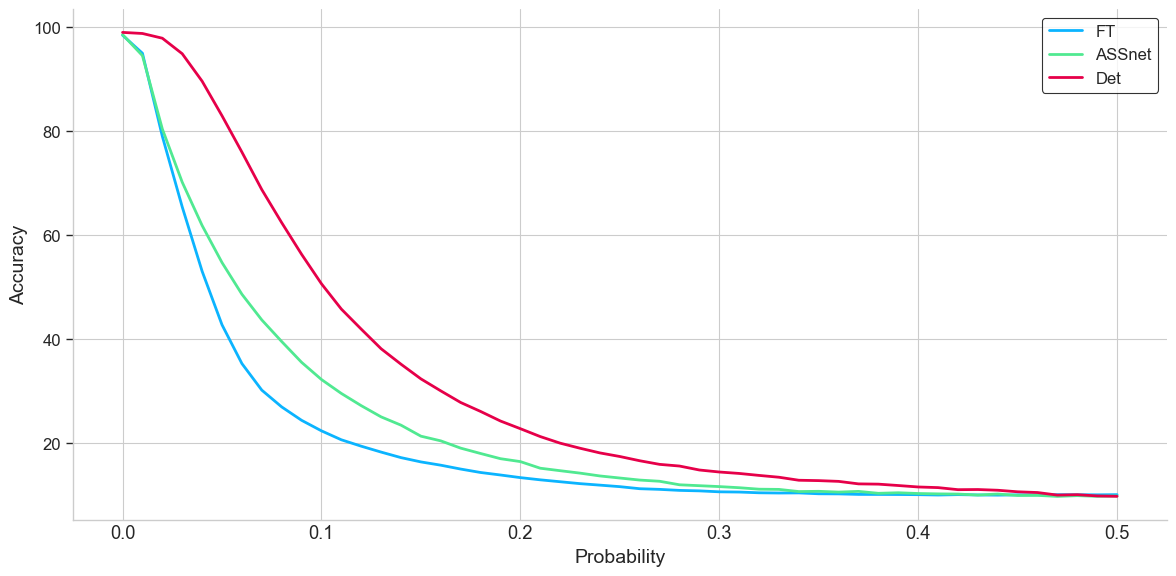

In [87]:
# plt.figure()
# plt.plot(probs, accs_robust_FT, label='FT')
# plt.plot(probs, accs_robust_ASSnet, label='ASSnet')
# plt.plot(probs, accs_robust_Det, label='Det')

# plt.xlabel('Probability')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.title('Accuracy vs Probability for models trained with thr 0.5')


# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(12, 6))


# Plot the data
ax.plot(probs, accs_robust_FT, color='#0bb4ff', linewidth=2, label='FT')
ax.plot(probs, accs_robust_ASSnet, color='#50e991', linewidth=2, label='ASSnet')
ax.plot(probs, accs_robust_Det, color='#e60049', linewidth=2, label='Det')

# Customize the plot
ax.set_xlabel('Probability', fontsize=14)
ax.set_ylabel('Accuracy', fontsize=14)
ax.legend(fontsize=12, frameon=True, facecolor='white', edgecolor='black')

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Customize ticks
ax.tick_params(axis='x', which='both', length=0)
ax.tick_params(axis='y', which='major', labelsize=12)

# Adjust layout and show
plt.tight_layout()
plt.savefig('prob_robust_0.5.pdf', dpi=600)
plt.savefig('prob_robust_0.5.png', dpi=600)

plt.show()


Text(0.5, 1.0, 'Accuracy vs Probability for models trained with thr 1.5')

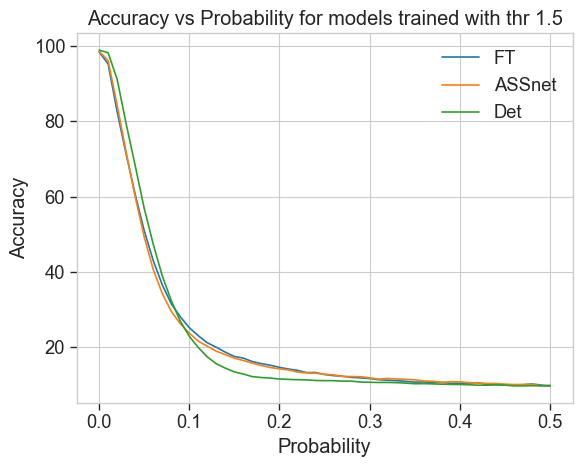

In [88]:
plt.figure()
plt.plot(probs, accs2_robust_FT, label='FT')
plt.plot(probs, accs2_robust_ASSnet, label='ASSnet')
plt.plot(probs, accs2_robust_Det, label='Det')

plt.xlabel('Probability')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs Probability for models trained with thr 1.5')

Text(0.5, 1.0, 'Accuracy vs Probability for models trained with thr 4.5')

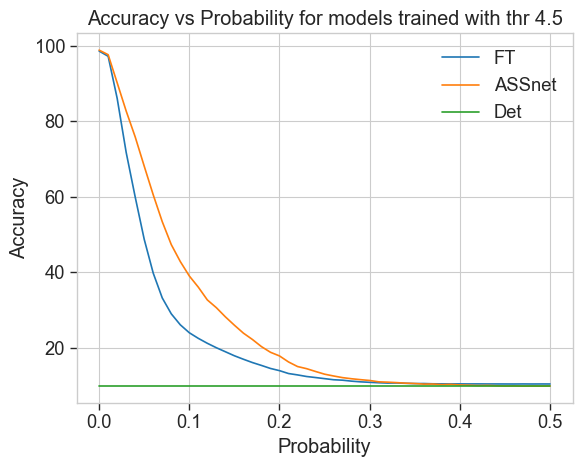

In [89]:
plt.figure()
plt.plot(probs, accs3_robust_FT, label='FT')
plt.plot(probs, accs3_robust_ASSnet, label='ASSnet')
plt.plot(probs, accs3_robust_Det, label='Det')

plt.xlabel('Probability')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs Probability for models trained with thr 4.5')

In [90]:
print(f'For Det model')
print(f'Thresh 0.5 prob {probs[0]} accuracy is {accs_robust_Det[0]}')
print(f'Thresh 0.5 prob {probs[10]} accuracy is {accs_robust_Det[10]}')
print(f'Thresh 0.5 prob {probs[20]} accuracy is {accs_robust_Det[20]}')
print(f'Thresh 0.5 prob {probs[30]} accuracy is {accs_robust_Det[30]}')
print(f'Thresh 0.5 prob {probs[40]} accuracy is {accs_robust_Det[40]}')
print(f'Thresh 0.5 prob {probs[50]} accuracy is {accs_robust_Det[50]}')
print(f'For FT model')
print(f'Thresh 0.5 prob {probs[0]} accuracy is {accs_robust_FT[0]}')
print(f'Thresh 0.5 prob {probs[10]} accuracy is {accs_robust_FT[10]}')
print(f'Thresh 0.5 prob {probs[20]} accuracy is {accs_robust_FT[20]}')
print(f'Thresh 0.5 prob {probs[30]} accuracy is {accs_robust_FT[30]}')
print(f'Thresh 0.5 prob {probs[40]} accuracy is {accs_robust_FT[40]}')
print(f'Thresh 0.5 prob {probs[50]} accuracy is {accs_robust_FT[50]}')

print(f'For ASSnet model')
print(f'Thresh 0.5 prob {probs[0]} accuracy is {accs_robust_ASSnet[0]}')
print(f'Thresh 0.5 prob {probs[10]} accuracy is {accs_robust_ASSnet[10]}')
print(f'Thresh 0.5 prob {probs[20]} accuracy is {accs_robust_ASSnet[20]}')
print(f'Thresh 0.5 prob {probs[30]} accuracy is {accs_robust_ASSnet[30]}')
print(f'Thresh 0.5 prob {probs[40]} accuracy is {accs_robust_ASSnet[40]}')
print(f'Thresh 0.5 prob {probs[50]} accuracy is {accs_robust_ASSnet[50]}')


For Det model
Thresh 0.5 prob 0.0 accuracy is 98.98838141025641
Thresh 0.5 prob 0.1 accuracy is 50.681089743589745
Thresh 0.5 prob 0.2 accuracy is 22.830528846153847
Thresh 0.5 prob 0.3 accuracy is 14.507211538461538
Thresh 0.5 prob 0.4 accuracy is 11.630608974358973
Thresh 0.5 prob 0.5 accuracy is 9.833733974358974
For FT model
Thresh 0.5 prob 0.0 accuracy is 98.45352564102564
Thresh 0.5 prob 0.1 accuracy is 22.415865384615383
Thresh 0.5 prob 0.2 accuracy is 13.427483974358974
Thresh 0.5 prob 0.3 accuracy is 10.699118589743591
Thresh 0.5 prob 0.4 accuracy is 10.150240384615383
Thresh 0.5 prob 0.5 accuracy is 10.15625
For ASSnet model
Thresh 0.5 prob 0.0 accuracy is 98.5637019230769
Thresh 0.5 prob 0.1 accuracy is 32.27964743589744
Thresh 0.5 prob 0.2 accuracy is 16.506410256410255
Thresh 0.5 prob 0.3 accuracy is 11.704727564102564
Thresh 0.5 prob 0.4 accuracy is 10.37459935897436
Thresh 0.5 prob 0.5 accuracy is 9.907852564102564


In [91]:
# plt.figure()
# plt.plot(probs, briers_robust_FT, label='FT')
# plt.plot(probs, briers_robust_ASSnet, label='ASSnet')
# plt.plot(probs, briers_robust_Det, label='Det')

# plt.xlabel('Probability')
# plt.ylabel('Brier Score')
# plt.legend()
# plt.title('Brier Score vs Probability for models trained with thr 0.5')
    

In [92]:
# plt.figure()
# plt.plot(probs, briers2_robust_FT, label='FT')
# plt.plot(probs, briers2_robust_ASSnet, label='ASSnet')
# plt.plot(probs, briers2_robust_Det, label='Det')

# plt.xlabel('Probability')
# plt.ylabel('Brier Score')
# plt.legend()
# plt.title('Brier Score vs Probability for models trained with thr 1.5')
    

In [93]:
# plt.figure()
# plt.plot(probs, briers3_robust_FT, label='FT')
# plt.plot(probs, briers3_robust_ASSnet, label='ASSnet')
# plt.plot(probs, briers3_robust_Det, label='Det')

# plt.xlabel('Probability')
# plt.ylabel('Brier Score')
# plt.legend()
# plt.title('Brier Score vs Probability for models trained with thr 4.5')
    

Text(0.5, 1.0, 'Brier Score vs Probability for models trained with thr 4.5')

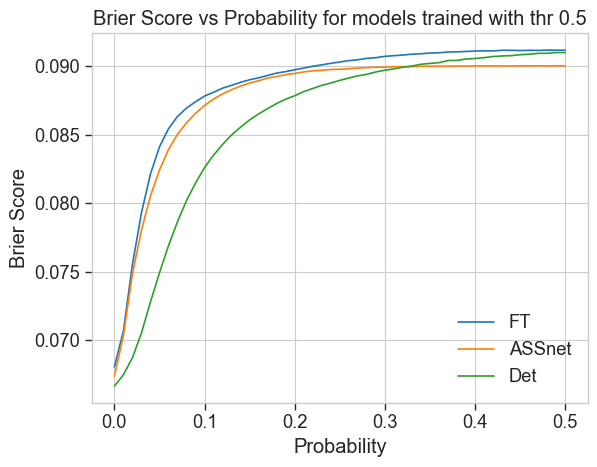

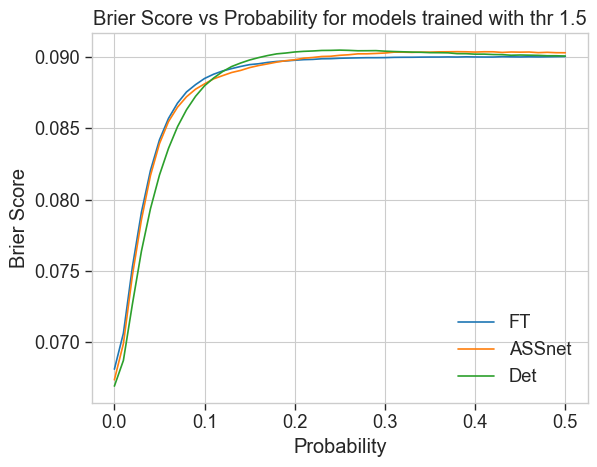

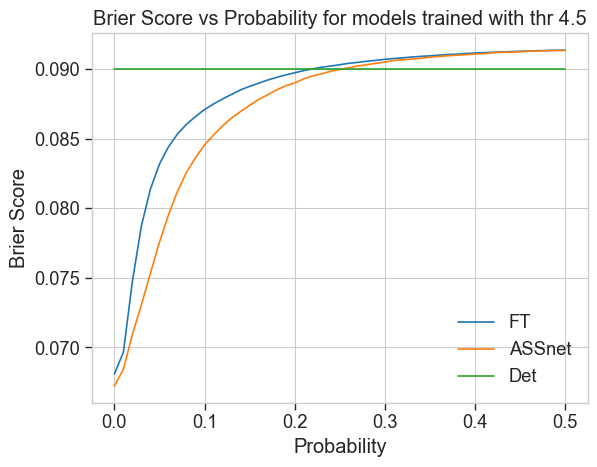

In [94]:
plt.figure()
plt.plot(probs, briers_sm_robust_FT, label='FT')
plt.plot(probs, briers_sm_robust_ASSnet, label='ASSnet')
plt.plot(probs, briers_sm_robust_Det, label='Det')

plt.xlabel('Probability')
plt.ylabel('Brier Score')
plt.legend()
plt.title('Brier Score vs Probability for models trained with thr 0.5')
    
plt.figure()
plt.plot(probs, briers2_sm_robust_FT, label='FT')
plt.plot(probs, briers2_sm_robust_ASSnet, label='ASSnet')
plt.plot(probs, briers2_sm_robust_Det, label='Det')

plt.xlabel('Probability')
plt.ylabel('Brier Score')
plt.legend()
plt.title('Brier Score vs Probability for models trained with thr 1.5')
    
plt.figure()
plt.plot(probs, briers3_sm_robust_FT, label='FT')
plt.plot(probs, briers3_sm_robust_ASSnet, label='ASSnet')
plt.plot(probs, briers3_sm_robust_Det, label='Det')

plt.xlabel('Probability')
plt.ylabel('Brier Score')
plt.legend()
plt.title('Brier Score vs Probability for models trained with thr 4.5')
    

Text(0.5, 1.0, 'Brier Score vs Probability for models trained with thr 4.5')

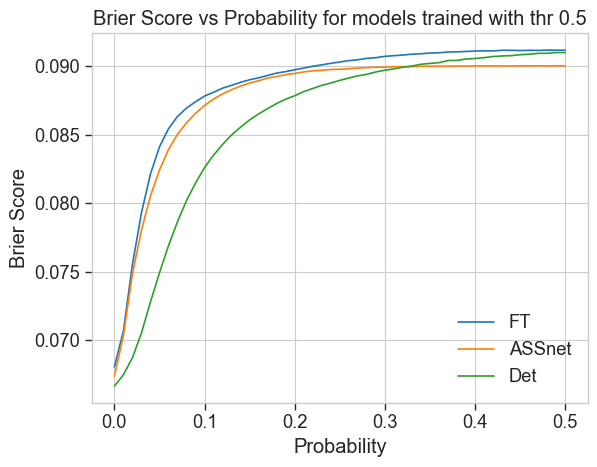

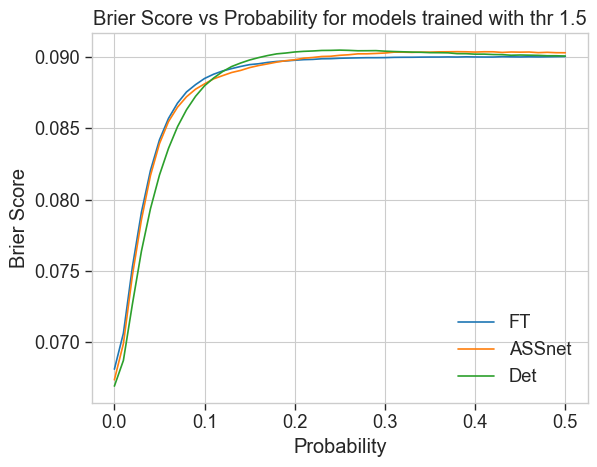

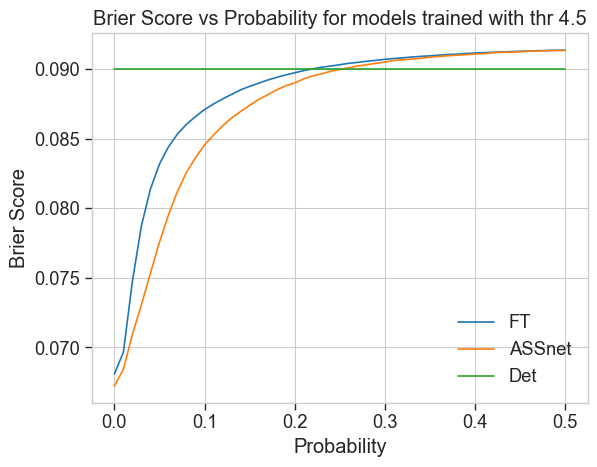

In [95]:
plt.figure()
plt.plot(probs, briers_sm_robust_FT, label='FT')
plt.plot(probs, briers_sm_robust_ASSnet, label='ASSnet')
plt.plot(probs, briers_sm_robust_Det, label='Det')

plt.xlabel('Probability')
plt.ylabel('Brier Score')
plt.legend()
plt.title('Brier Score vs Probability for models trained with thr 0.5')
    
plt.figure()
plt.plot(probs, briers2_sm_robust_FT, label='FT')
plt.plot(probs, briers2_sm_robust_ASSnet, label='ASSnet')
plt.plot(probs, briers2_sm_robust_Det, label='Det')

plt.xlabel('Probability')
plt.ylabel('Brier Score')
plt.legend()
plt.title('Brier Score vs Probability for models trained with thr 1.5')
    
plt.figure()
plt.plot(probs, briers3_sm_robust_FT, label='FT')
plt.plot(probs, briers3_sm_robust_ASSnet, label='ASSnet')
plt.plot(probs, briers3_sm_robust_Det, label='Det')

plt.xlabel('Probability')
plt.ylabel('Brier Score')
plt.legend()
plt.title('Brier Score vs Probability for models trained with thr 4.5')
    

In [96]:
with open(r'Experiment_NMNIST\Plots\Plot_data\FT_spars_vs_thr_beta0.9_num_steps30_trainedthr_8.0_compare.pkl', 'rb') as f:
    data = pickle.load(f)
    v_thrs = data['thresholds']
    L1_1_sparss_FT = data['L1_1_sparss']
    L1_2_sparss_FT = data['L1_2_sparss']
    L1_3_sparss_FT = data['L1_3_sparss']
    L2_1_sparss_FT = data['L2_1_sparss']
    L2_2_sparss_FT = data['L2_2_sparss']
    L2_3_sparss_FT = data['L2_3_sparss']
    L3_1_sparss_FT = data['L3_1_sparss']
    L3_2_sparss_FT = data['L3_2_sparss']
    L3_3_sparss_FT = data['L3_3_sparss']

    
with open(r'Experiment_NMNIST\Plots\Plot_data\FT_spars_vs_thr_beta0.9_num_steps30_trainedthr_11.0_compare_extra.pkl', 'rb') as f:
    data = pickle.load(f)
    v_thrs = np.concatenate((v_thrs, data['thresholds']))
    L1_1_sparss_FT += data['L1_1_sparss']
    L1_2_sparss_FT += data['L1_2_sparss']
    L1_3_sparss_FT += data['L1_3_sparss']
    L2_1_sparss_FT += data['L2_1_sparss']
    L2_2_sparss_FT += data['L2_2_sparss']
    L2_3_sparss_FT += data['L2_3_sparss']
    L3_1_sparss_FT += data['L3_1_sparss']
    L3_2_sparss_FT += data['L3_2_sparss']
    L3_3_sparss_FT += data['L3_3_sparss']


model_1_meanspars_FT = torch.mean(torch.tensor([L1_1_sparss_FT, L2_1_sparss_FT, L3_1_sparss_FT]), dim=0)
model_2_meanspars_FT = torch.mean(torch.tensor([L1_2_sparss_FT, L2_2_sparss_FT, L3_2_sparss_FT]), dim=0)
model_3_meanspars_FT = torch.mean(torch.tensor([L1_3_sparss_FT, L2_3_sparss_FT, L3_3_sparss_FT]), dim=0)


In [97]:
with open(r'Experiment_NMNIST\Plots\Plot_data\ASSnet_spars_vs_thr_beta0.9_num_steps30_trainedthr_8.0_compare.pkl', 'rb') as f:
    data = pickle.load(f)
    # v_thrs = data['thresholds']
    L1_1_sparss_ASSnet = data['L1_1_sparss']
    L1_2_sparss_ASSnet = data['L1_2_sparss']
    L1_3_sparss_ASSnet = data['L1_3_sparss']
    L2_1_sparss_ASSnet = data['L2_1_sparss']
    L2_2_sparss_ASSnet = data['L2_2_sparss']
    L2_3_sparss_ASSnet = data['L2_3_sparss']
    L3_1_sparss_ASSnet = data['L3_1_sparss']
    L3_2_sparss_ASSnet = data['L3_2_sparss']
    L3_3_sparss_ASSnet = data['L3_3_sparss']

    
with open(r'Experiment_NMNIST\Plots\Plot_data\ASSnet_spars_vs_thr_beta0.9_num_steps30_trainedthr_11.0_compare_extra.pkl', 'rb') as f:
    data = pickle.load(f)
    # v_thrs += data['thresholds']
    L1_1_sparss_ASSnet += data['L1_1_sparss']
    L1_2_sparss_ASSnet += data['L1_2_sparss']
    L1_3_sparss_ASSnet += data['L1_3_sparss']
    L2_1_sparss_ASSnet += data['L2_1_sparss']
    L2_2_sparss_ASSnet += data['L2_2_sparss']
    L2_3_sparss_ASSnet += data['L2_3_sparss']
    L3_1_sparss_ASSnet += data['L3_1_sparss']
    L3_2_sparss_ASSnet += data['L3_2_sparss']
    L3_3_sparss_ASSnet += data['L3_3_sparss']


model_1_meanspars_ASSnet = torch.mean(torch.tensor([L1_1_sparss_ASSnet, L2_1_sparss_ASSnet, L3_1_sparss_ASSnet]), dim=0)
model_2_meanspars_ASSnet = torch.mean(torch.tensor([L1_2_sparss_ASSnet, L2_2_sparss_ASSnet, L3_2_sparss_ASSnet]), dim=0)
model_3_meanspars_ASSnet = torch.mean(torch.tensor([L1_3_sparss_ASSnet, L2_3_sparss_ASSnet, L3_3_sparss_ASSnet]), dim=0)


In [98]:

# # Set the style
# plt.style.use('seaborn-v0_8-whitegrid')
# sns.set_context("paper", font_scale=1.5)

# # Create the figure and axis objects
# fig, ax = plt.subplots(figsize=(12, 6))


# # Plot the data
# ax.plot(model_1_meanspars_ASSnet, accs, color='#0bb4ff', linewidth=2, label='Trained with thr 0.5')
# ax.plot(model_2_meanspars_ASSnet, accs2, color='#50e991', linewidth=2, label='Trained with thr 1.5')
# ax.plot(model_3_meanspars_ASSnet, accs3, color='#e60049', linewidth=2, label='Trained with thr 4.5')

# # Customize the plot
# ax.set_xlabel('Sparsity', fontsize=14)
# ax.set_ylabel('Accuracy', fontsize=14)
# ax.legend(fontsize=12, frameon=True, facecolor='white', edgecolor='black')
# ax.set_title('Fixed Temp Sparsity vs Accuracy', fontsize=16, fontweight='bold')

# # Remove top and right spines
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)

# # Customize ticks
# ax.tick_params(axis='x', which='both', length=0)
# ax.tick_params(axis='y', which='major', labelsize=12)

# # Adjust layout and show
# plt.tight_layout()
# plt.savefig('sparsity_vs_accuracy.pdf', dpi=600)
# plt.savefig('sparsity_vs_accuracy.png', dpi=600)

# plt.show()



In [99]:
with open(r'Experiment_NMNIST\Plots\Plot_data\Det_spars_vs_thr_beta0.9_num_steps30_trainedthr_8.0_compare.pkl', 'rb') as f:
    data = pickle.load(f)
    # v_thrs = data['thresholds']
    L1_1_sparss_Det = data['L1_1_sparss']
    L1_2_sparss_Det = data['L1_2_sparss']
    L1_3_sparss_Det = data['L1_3_sparss']
    L2_1_sparss_Det = data['L2_1_sparss']
    L2_2_sparss_Det = data['L2_2_sparss']
    L2_3_sparss_Det = data['L2_3_sparss']
    L3_1_sparss_Det = data['L3_1_sparss']
    L3_2_sparss_Det = data['L3_2_sparss']
    L3_3_sparss_Det = data['L3_3_sparss']

    
with open(r'Experiment_NMNIST\Plots\Plot_data\Det_spars_vs_thr_beta0.9_num_steps30_trainedthr_11.0_compare_extra.pkl', 'rb') as f:
    data = pickle.load(f)
    # v_thrs += data['thresholds']
    L1_1_sparss_Det += data['L1_1_sparss']
    L1_2_sparss_Det += data['L1_2_sparss']
    L1_3_sparss_Det += data['L1_3_sparss']
    L2_1_sparss_Det += data['L2_1_sparss']
    L2_2_sparss_Det += data['L2_2_sparss']
    L2_3_sparss_Det += data['L2_3_sparss']
    L3_1_sparss_Det += data['L3_1_sparss']
    L3_2_sparss_Det += data['L3_2_sparss']
    L3_3_sparss_Det += data['L3_3_sparss']


model_1_meanspars_Det = torch.mean(torch.tensor([L1_1_sparss_Det, L2_1_sparss_Det, L3_1_sparss_Det]), dim=0)
model_2_meanspars_Det = torch.mean(torch.tensor([L1_2_sparss_Det, L2_2_sparss_Det, L3_2_sparss_Det]), dim=0)
model_3_meanspars_Det = torch.mean(torch.tensor([L1_3_sparss_Det, L2_3_sparss_Det, L3_3_sparss_Det]), dim=0)


In [100]:
print(v_thrs)

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3
  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7
  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1
  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5
  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9
  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.   8.1  8.2
  8.3  8.4  8.5  8.6  8.7  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6
  9.7  9.8  9.9 10.  10.1 10.2 10.3 10.4 10.5 10.6 10.7 10.8 10.9 11. ]


In [101]:
print(f'Sparsity for threshold {v_thrs[5]} is {model_1_meanspars_FT[5]}')
print(f'Sparsity for threshold {v_thrs[15]} is {model_2_meanspars_FT[15]}')
print(f'Sparsity for threshold {v_thrs[45]} is {model_3_meanspars_FT[54]}')

print(f'Sparsity for threshold {v_thrs[5]} is {model_1_meanspars_ASSnet[5]}')
print(f'Sparsity for threshold {v_thrs[15]} is {model_2_meanspars_ASSnet[15]}')
print(f'Sparsity for threshold {v_thrs[45]} is {model_3_meanspars_ASSnet[54]}')

print(f'Sparsity for threshold {v_thrs[5]} is {model_1_meanspars_Det[5]}')
print(f'Sparsity for threshold {v_thrs[15]} is {model_2_meanspars_Det[15]}')
print(f'Sparsity for threshold {v_thrs[45]} is {model_3_meanspars_Det[54]}')


Sparsity for threshold 0.5 is 0.2524751126766205
Sparsity for threshold 1.5 is 0.23603253066539764
Sparsity for threshold 4.5 is 0.17439401149749756
Sparsity for threshold 0.5 is 0.18957197666168213
Sparsity for threshold 1.5 is 0.16006244719028473
Sparsity for threshold 4.5 is 0.16648870706558228
Sparsity for threshold 0.5 is 0.09554988145828247
Sparsity for threshold 1.5 is 0.15424683690071106
Sparsity for threshold 4.5 is 0.0


Text(0.5, 1.0, 'Sparsity vs Threshold for ASSnet')

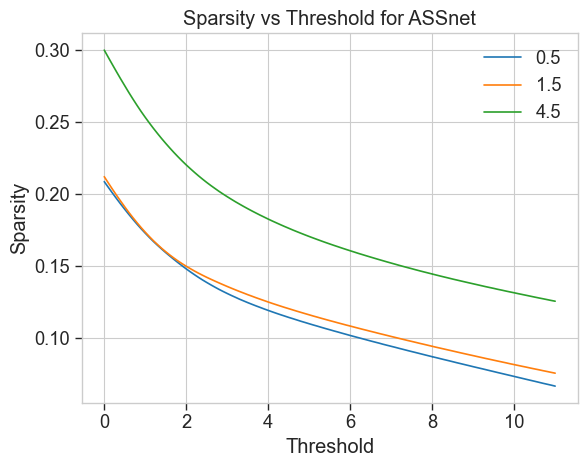

In [102]:
plt.figure()
plt.plot(v_thrs, model_1_meanspars_ASSnet, label = '0.5')
plt.plot(v_thrs, model_2_meanspars_ASSnet, label = '1.5')
plt.plot(v_thrs, model_3_meanspars_ASSnet, label = '4.5')

plt.xlabel('Threshold')
plt.ylabel('Sparsity')
plt.legend()
plt.title('Sparsity vs Threshold for ASSnet')

Text(0.5, 1.0, 'Sparsity vs Threshold for models trained with thr 0.5')

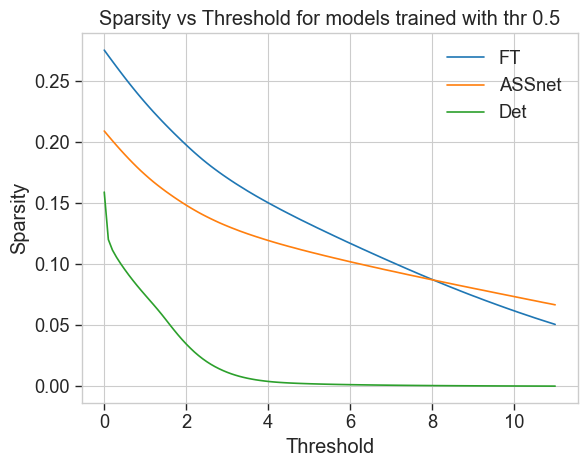

In [103]:
plt.figure()
plt.plot(v_thrs, model_1_meanspars_FT, label='FT')
plt.plot(v_thrs, model_1_meanspars_ASSnet, label='ASSnet')
plt.plot(v_thrs, model_1_meanspars_Det, label='Det')

plt.xlabel('Threshold')
plt.ylabel('Sparsity')
plt.legend()
plt.title('Sparsity vs Threshold for models trained with thr 0.5')

Text(0.5, 1.0, 'Sparsity vs Threshold for models trained with thr 1.5')

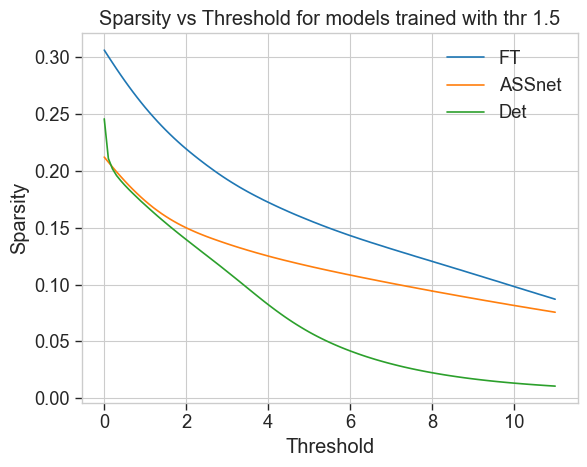

In [104]:
plt.figure()
plt.plot(v_thrs, model_2_meanspars_FT, label='FT')
plt.plot(v_thrs, model_2_meanspars_ASSnet, label='ASSnet')
plt.plot(v_thrs, model_2_meanspars_Det, label='Det')

plt.xlabel('Threshold')
plt.ylabel('Sparsity')
plt.legend()
plt.title('Sparsity vs Threshold for models trained with thr 1.5')

Text(0.5, 1.0, 'Sparsity vs Threshold for models trained with thr 4.5')

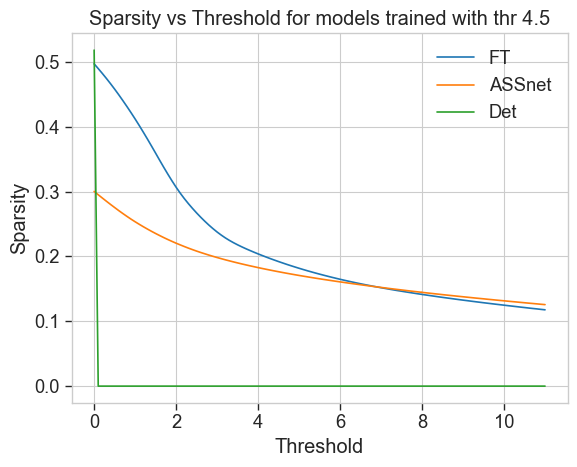

In [105]:
plt.figure()
plt.plot(v_thrs, model_3_meanspars_FT, label='FT')
plt.plot(v_thrs, model_3_meanspars_ASSnet, label='ASSnet')
plt.plot(v_thrs, model_3_meanspars_Det, label='Det')

plt.xlabel('Threshold')
plt.ylabel('Sparsity')
plt.legend()
plt.title('Sparsity vs Threshold for models trained with thr 4.5')

In [106]:
# Load data from the pickle file for accuracy vs threshold
with open(r'Experiment_NMNIST\Plots\Plot_data\FT_acc_vs_thr_beta0.9_num_steps30_trainedthr_8.0_compare.pkl', 'rb') as f:
    data = pickle.load(f)
    accs_FT = data['accs']
    accs2_FT = data['accs2']
    accs3_FT = data['accs3']
    briers_FT = data['briers']
    briers2_FT = data['briers2']
    briers3_FT = data['briers3']
    briers_sm_FT = data['briers_sm']
    briers2_sm_FT = data['briers2_sm']
    briers3_sm_FT = data['briers3_sm']

# Load data from the pickle file for accuracy vs threshold
with open(r'Experiment_NMNIST\Plots\Plot_data\FT_acc_vs_thr_beta0.9_num_steps30_trainedthr_11.0_compare_extra.pkl', 'rb') as f:
    data = pickle.load(f)
    accs_FT += data['accs']
    accs2_FT += data['accs2']
    accs3_FT += data['accs3']
    briers_FT += data['briers']
    briers2_FT += data['briers2']
    briers3_FT += data['briers3']
    briers_sm_FT += data['briers_sm']
    briers2_sm_FT += data['briers2_sm']
    briers3_sm_FT += data['briers3_sm']

In [107]:
# Load data from the pickle file for accuracy vs threshold
with open(r'Experiment_NMNIST\Plots\Plot_data\ASSnet_acc_vs_thr_beta0.9_num_steps30_trainedthr_8.0_compare.pkl', 'rb') as f:
    data = pickle.load(f)
    accs_ASSnet = data['accs']
    accs2_ASSnet = data['accs2']
    accs3_ASSnet = data['accs3']
    briers_ASSnet = data['briers']
    briers2_ASSnet = data['briers2']
    briers3_ASSnet = data['briers3']
    briers_sm_ASSnet = data['briers_sm']
    briers2_sm_ASSnet = data['briers2_sm']
    briers3_sm_ASSnet = data['briers3_sm']

# Load data from the pickle file for accuracy vs threshold
with open(r'Experiment_NMNIST\Plots\Plot_data\ASSnet_acc_vs_thr_beta0.9_num_steps30_trainedthr_11.0_compare_extra.pkl', 'rb') as f:
    data = pickle.load(f)
    accs_ASSnet += data['accs']
    accs2_ASSnet += data['accs2']
    accs3_ASSnet += data['accs3']
    briers_ASSnet += data['briers']
    briers2_ASSnet += data['briers2']
    briers3_ASSnet += data['briers3']
    briers_sm_ASSnet += data['briers_sm']
    briers2_sm_ASSnet += data['briers2_sm']
    briers3_sm_ASSnet += data['briers3_sm']

In [108]:
# Load data from the pickle file for accuracy vs threshold
with open(r'Experiment_NMNIST\Plots\Plot_data\Det_acc_vs_thr_beta0.9_num_steps30_trainedthr_8.0_compare.pkl', 'rb') as f:
    data = pickle.load(f)
    accs_Det = data['accs']
    accs2_Det = data['accs2']
    accs3_Det = data['accs3']
    briers_Det = data['briers']
    briers2_Det = data['briers2']
    briers3_Det = data['briers3']
    briers_sm_Det = data['briers_sm']
    briers2_sm_Det = data['briers2_sm']
    briers3_sm_Det = data['briers3_sm']

# Load data from the pickle file for accuracy vs threshold
with open(r'Experiment_NMNIST\Plots\Plot_data\Det_acc_vs_thr_beta0.9_num_steps30_trainedthr_11.0_compare_extra.pkl', 'rb') as f:
    data = pickle.load(f)
    accs_Det += data['accs']
    accs2_Det += data['accs2']
    accs3_Det += data['accs3']
    briers_Det += data['briers']
    briers2_Det += data['briers2']
    briers3_Det += data['briers3']
    briers_sm_Det += data['briers_sm']
    briers2_sm_Det += data['briers2_sm']
    briers3_sm_Det += data['briers3_sm']

In [109]:
accs_FT_list = [np.array(accs_FT), np.array(accs2_FT), np.array(accs3_FT)]
spars_FT_list = [np.array(model_1_meanspars_FT), np.array(model_2_meanspars_FT), np.array(model_3_meanspars_FT)]

accs_ASSnet_list = [np.array(accs_ASSnet), np.array(accs2_ASSnet), np.array(accs3_ASSnet)]
spars_ASSnet_list = [np.array(model_1_meanspars_ASSnet), np.array(model_2_meanspars_ASSnet), np.array(model_3_meanspars_ASSnet)]

accs_Det_list = [np.array(accs_Det), np.array(accs2_Det), np.array(accs3_Det)]
spars_Det_list = [np.array(model_1_meanspars_Det), np.array(model_2_meanspars_Det), np.array(model_3_meanspars_Det)]

Text(0.5, 1.0, 'Accuracy vs Sparsity for models trained with thr 0.5')

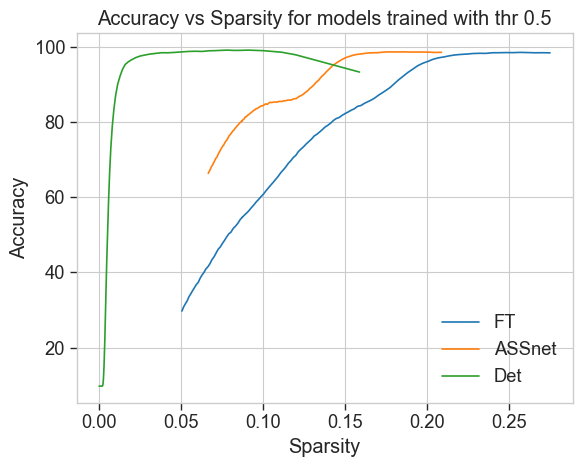

In [110]:
plt.figure()
plt.plot(model_1_meanspars_FT, accs_FT, label='FT')
plt.plot(model_1_meanspars_ASSnet, accs_ASSnet, label='ASSnet')
plt.plot(model_1_meanspars_Det, accs_Det, label='Det')

plt.xlabel('Sparsity')
plt.ylabel('Accuracy')
plt.legend()

plt.title('Accuracy vs Sparsity for models trained with thr 0.5')         

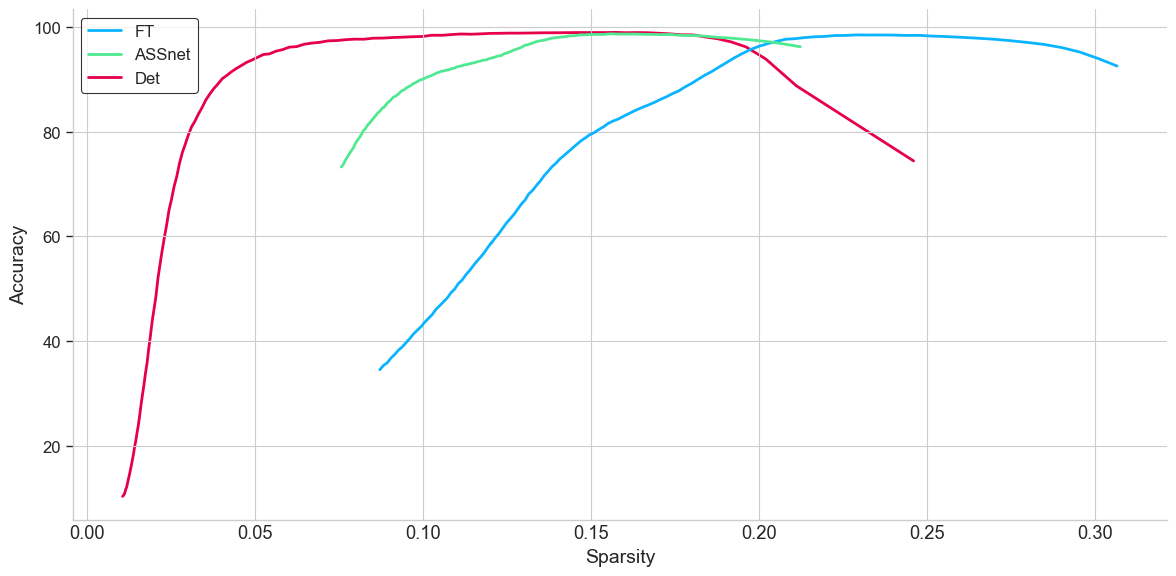

In [111]:
# plt.figure()
# plt.plot(model_2_meanspars_FT, accs2_FT, label='FT')
# plt.plot(model_2_meanspars_ASSnet, accs2_ASSnet, label='ASSnet')
# plt.plot(model_2_meanspars_Det, accs2_Det, label='Det')

# plt.xlabel('Sparsity')
# plt.ylabel('Accuracy')
# plt.legend()

# plt.title('Accuracy vs Sparsity for models trained with thr 1.5')         

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(model_2_meanspars_FT, accs2_FT, color='#0bb4ff', linewidth=2, label='FT')
ax.plot(model_2_meanspars_ASSnet, accs2_ASSnet, color='#50e991', linewidth=2, label='ASSnet')
ax.plot(model_2_meanspars_Det, accs2_Det, color='#e60049', linewidth=2, label='Det', zorder = 0)

# Customize the plot
ax.set_xlabel('Sparsity', fontsize=14)
ax.set_ylabel('Accuracy', fontsize=14)
ax.legend(fontsize=12, frameon=True, facecolor='white', edgecolor='black')

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Customize ticks
ax.tick_params(axis='x', which='both', length=0)
ax.tick_params(axis='y', which='major', labelsize=12)

# Adjust layout and show
plt.tight_layout()
# plt.savefig('sparsity_vs_accuracy_1.5.pdf', dpi=600)
# plt.savefig('sparsity_vs_accuracy_1.5.png', dpi=600)
plt.show()



Text(0.5, 1.0, 'Accuracy vs Sparsity for models trained with thr 4.5')

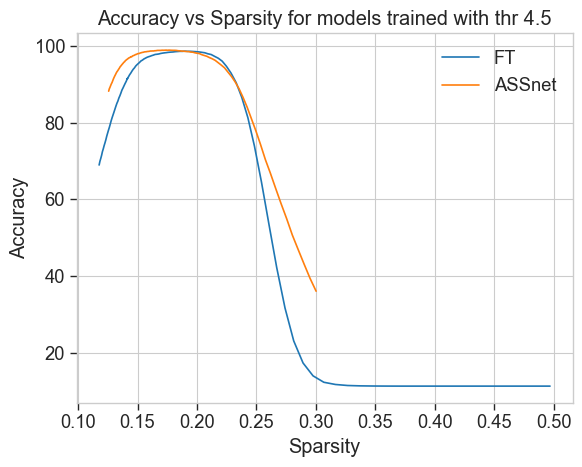

In [112]:
plt.figure()
plt.plot(model_3_meanspars_FT, accs3_FT, label='FT')
plt.plot(model_3_meanspars_ASSnet, accs3_ASSnet, label='ASSnet')
# plt.plot(model_3_meanspars_Det, accs3_Det, label='Det')

plt.xlabel('Sparsity')
plt.ylabel('Accuracy')
plt.legend()

plt.title('Accuracy vs Sparsity for models trained with thr 4.5')         

In [113]:
## Generate Sparsity - ACC table
## Thresholds has 98% - 95% and 90%  75%



thresholds = [98, 95, 90]
threshtrain = [0.5, 1.5, 4.5]

for i in range(3):
    print(f'For trained threshold of {threshtrain[i]}')
    for thresh in thresholds:
        ids = np.where(accs_FT_list[i] >= thresh)
        print(f'FT {thresh} Smallest spars is {np.min(spars_FT_list[i][ids])}')
        ids = np.where(accs_ASSnet_list[i] >= thresh)
        print(f'ASSnet {thresh} Smallest spars is {np.min(spars_ASSnet_list[i][ids])}')
        if i != 2:
            ids = np.where(accs_Det_list[i] >= thresh)
            print(f'Det {thresh} Smallest spars is {np.min(spars_Det_list[i][ids])}')




For trained threshold of 0.5
FT 98 Smallest spars is 0.22443144023418427
ASSnet 98 Smallest spars is 0.15945573151111603
Det 98 Smallest spars is 0.031247982755303383
FT 95 Smallest spars is 0.197343111038208
ASSnet 95 Smallest spars is 0.14414161443710327
Det 95 Smallest spars is 0.016141584143042564
FT 90 Smallest spars is 0.18007129430770874
ASSnet 90 Smallest spars is 0.132455512881279
Det 90 Smallest spars is 0.01287661213427782
For trained threshold of 1.5
FT 98 Smallest spars is 0.21638475358486176
ASSnet 98 Smallest spars is 0.14095954596996307
Det 98 Smallest spars is 0.09387785196304321
FT 95 Smallest spars is 0.19730325043201447
ASSnet 95 Smallest spars is 0.12513212859630585
Det 95 Smallest spars is 0.056231752038002014
FT 90 Smallest spars is 0.18377207219600677
ASSnet 90 Smallest spars is 0.09979518502950668
Det 90 Smallest spars is 0.04026413336396217
For trained threshold of 4.5
FT 98 Smallest spars is 0.16940049827098846
ASSnet 98 Smallest spars is 0.15138815343379974


Text(0.5, 1.0, 'Accuracy vs Sparsity for models trained with thr 0.5')

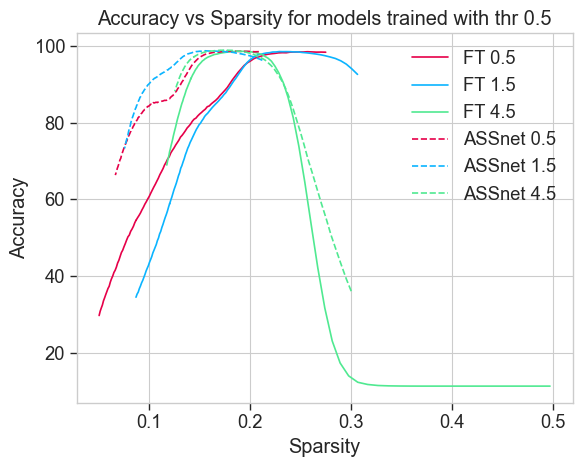

In [114]:


plt.figure()
plt.plot(model_1_meanspars_FT, accs_FT, label='FT 0.5', linestyle='-', color = colors[0]) 
plt.plot(model_2_meanspars_FT, accs2_FT, label='FT 1.5', linestyle='-', color = colors[1])
plt.plot(model_3_meanspars_FT, accs3_FT, label='FT 4.5', linestyle='-', color = colors[2])


plt.plot(model_1_meanspars_ASSnet, accs_ASSnet, label='ASSnet 0.5', linestyle = '--', color = colors[0])
plt.plot(model_2_meanspars_ASSnet, accs2_ASSnet, label='ASSnet 1.5', linestyle = '--', color = colors[1])
plt.plot(model_3_meanspars_ASSnet, accs3_ASSnet, label='ASSnet 4.5', linestyle = '--', color = colors[2])


plt.xlabel('Sparsity')
plt.ylabel('Accuracy')
plt.legend()

plt.title('Accuracy vs Sparsity for models trained with thr 0.5')         

Text(0.5, 1.0, 'Accuracy vs Sparsity for models trained with thr 4.5')

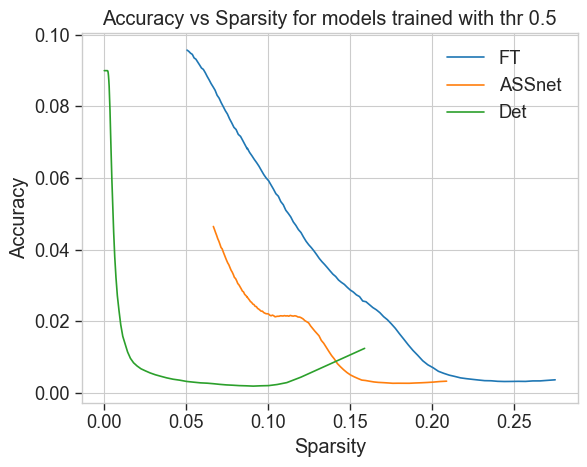

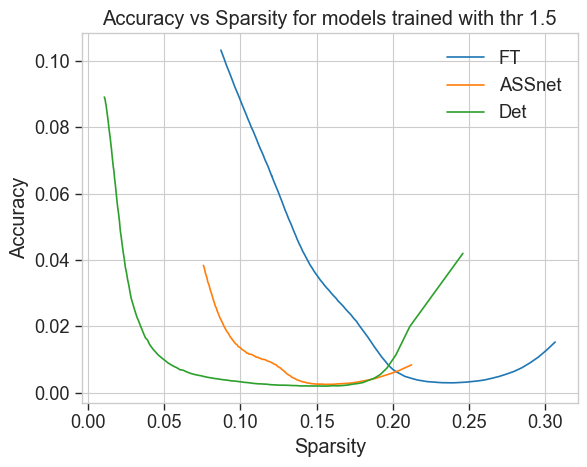

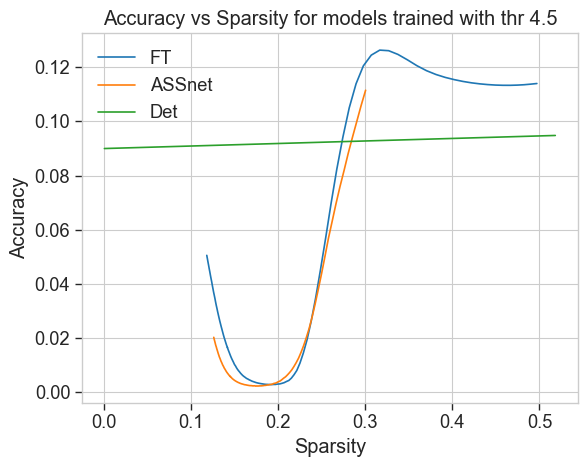

In [115]:
plt.figure()
plt.plot(model_1_meanspars_FT, briers_FT, label='FT')
plt.plot(model_1_meanspars_ASSnet, briers_ASSnet, label='ASSnet')
plt.plot(model_1_meanspars_Det, briers_Det, label='Det')

plt.xlabel('Sparsity')
plt.ylabel('Accuracy')
plt.legend()

plt.title('Accuracy vs Sparsity for models trained with thr 0.5')

plt.figure()
plt.plot(model_2_meanspars_FT, briers2_FT, label='FT')
plt.plot(model_2_meanspars_ASSnet, briers2_ASSnet, label='ASSnet')
plt.plot(model_2_meanspars_Det, briers2_Det, label='Det')

plt.xlabel('Sparsity')
plt.ylabel('Accuracy')
plt.legend()

plt.title('Accuracy vs Sparsity for models trained with thr 1.5')         
        
plt.figure()
plt.plot(model_3_meanspars_FT, briers3_FT, label='FT')
plt.plot(model_3_meanspars_ASSnet, briers3_ASSnet, label='ASSnet')
plt.plot(model_3_meanspars_Det, briers3_Det, label='Det')

plt.xlabel('Sparsity')
plt.ylabel('Accuracy')
plt.legend()

plt.title('Accuracy vs Sparsity for models trained with thr 4.5')    

Text(0.5, 1.0, 'Accuracy vs Sparsity for models trained with thr 4.5')

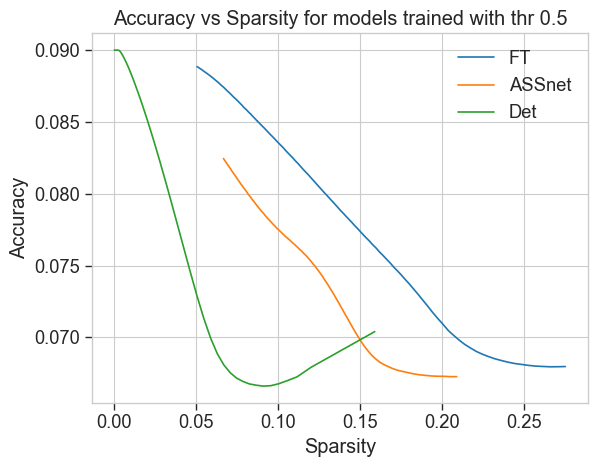

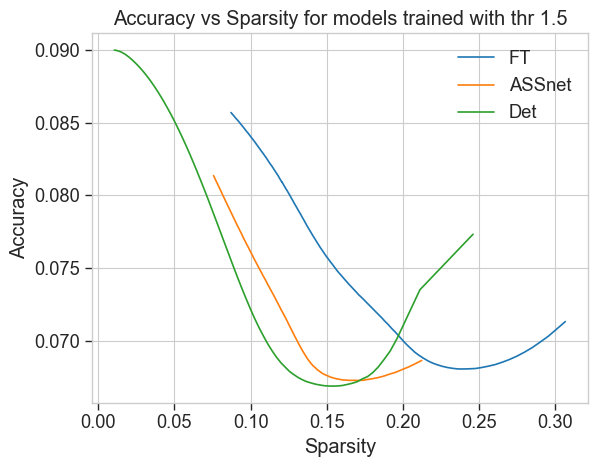

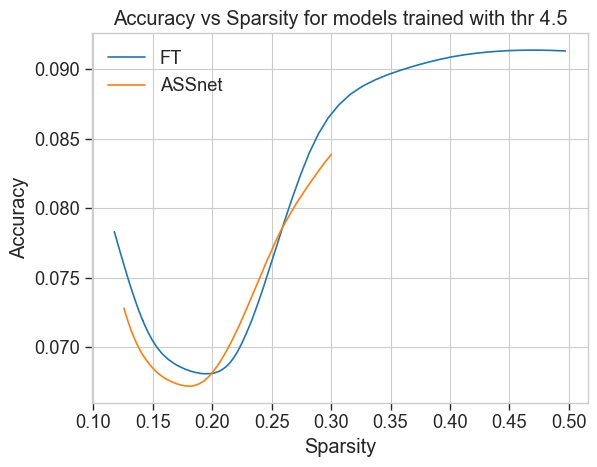

In [116]:
plt.figure()
plt.plot(model_1_meanspars_FT, briers_sm_FT, label='FT')
plt.plot(model_1_meanspars_ASSnet, briers_sm_ASSnet, label='ASSnet')
plt.plot(model_1_meanspars_Det, briers_sm_Det, label='Det')

plt.xlabel('Sparsity')
plt.ylabel('Accuracy')
plt.legend()

plt.title('Accuracy vs Sparsity for models trained with thr 0.5')         
plt.figure()
plt.plot(model_2_meanspars_FT, briers2_sm_FT, label='FT')
plt.plot(model_2_meanspars_ASSnet, briers2_sm_ASSnet, label='ASSnet')
plt.plot(model_2_meanspars_Det, briers2_sm_Det, label='Det')

plt.xlabel('Sparsity')
plt.ylabel('Accuracy')
plt.legend()

plt.title('Accuracy vs Sparsity for models trained with thr 1.5')   

        
plt.figure()
plt.plot(model_3_meanspars_FT, briers3_sm_FT, label='FT')
plt.plot(model_3_meanspars_ASSnet, briers3_sm_ASSnet, label='ASSnet')
# plt.plot(model_3_meanspars_Det, briers3_sm_Det, label='Det')

plt.xlabel('Sparsity')
plt.ylabel('Accuracy')
plt.legend()

plt.title('Accuracy vs Sparsity for models trained with thr 4.5')    

Text(0.5, 1.0, 'Accuracy vs Sparsity for models trained with thr 4.5')

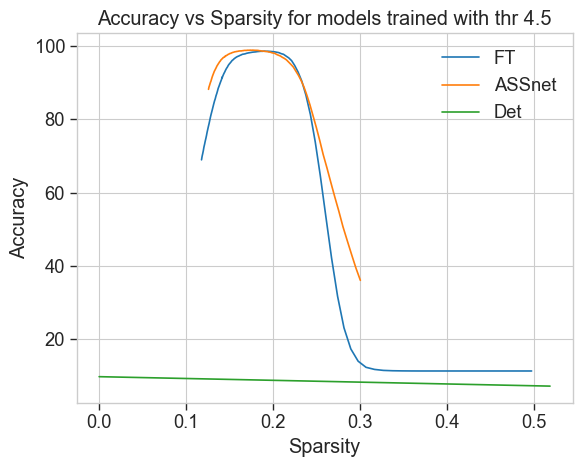

In [117]:
plt.figure()
plt.plot(model_3_meanspars_FT, accs3_FT, label='FT')
plt.plot(model_3_meanspars_ASSnet, accs3_ASSnet, label='ASSnet')
plt.plot(model_3_meanspars_Det, accs3_Det, label='Det')

plt.xlabel('Sparsity')
plt.ylabel('Accuracy')
plt.legend()

plt.title('Accuracy vs Sparsity for models trained with thr 4.5')         

In [118]:
# Load data from the pickle file for accuracy vs threshold
with open(r'Experiment_NMNIST\Plots\Plot_data\FT_prob_Robustness_beta0.9_num_steps30_trainedthr_compare_single_spike.pkl', 'rb') as f:
    data = pickle.load(f)
    accs_FT = data['accs']
    accs2_FT = data['accs2']
    accs3_FT = data['accs3']
    prons = data['probs']


# Load data from the pickle file for accuracy vs threshold
with open(r'Experiment_NMNIST\Plots\Plot_data\ASSnet_prob_Robustness_beta0.9_num_steps30_trainedthr_compare_single_spike.pkl', 'rb') as f:
    data = pickle.load(f)
    accs_ASSnet = data['accs']
    accs2_ASSnet = data['accs2']
    accs3_ASSnet = data['accs3']


# Load data from the pickle file for accuracy vs threshold
with open(r'Experiment_NMNIST\Plots\Plot_data\Det_prob_Robustness_beta0.9_num_steps30_trainedthr_compare_single_spike.pkl', 'rb') as f:
    data = pickle.load(f)
    accs_Det = data['accs']
    accs2_Det = data['accs2']
    accs3_Det = data['accs3']



Text(0.5, 1.0, 'Accuracy vs Probability for models trained with thr 4.5')

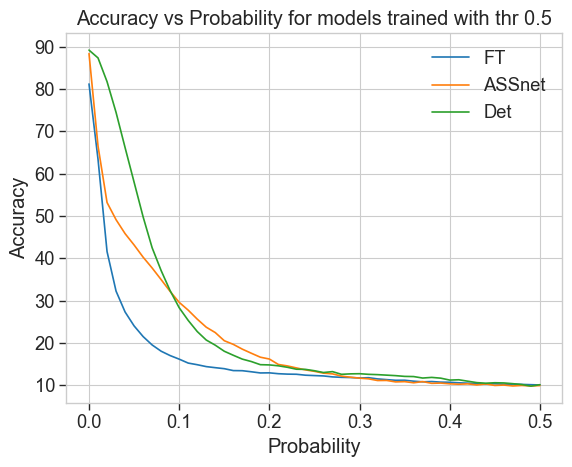

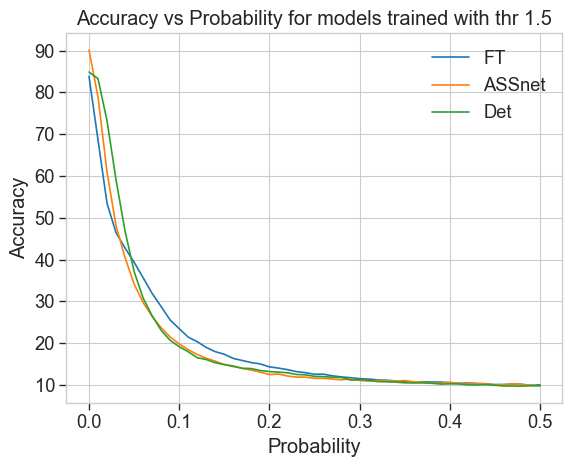

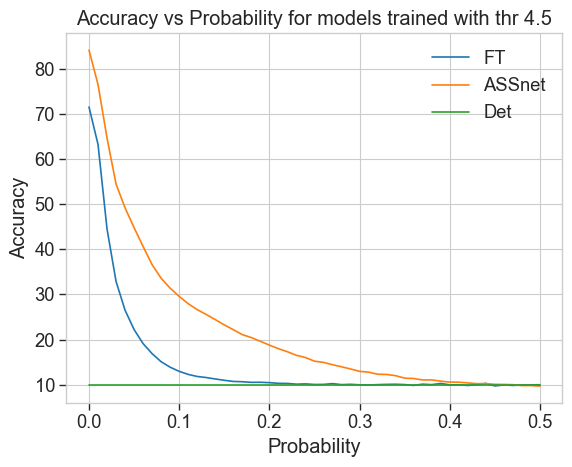

In [119]:
plt.figure()
plt.plot(probs, accs_FT, label='FT')
plt.plot(probs, accs_ASSnet, label='ASSnet')
plt.plot(probs, accs_Det, label='Det')

plt.xlabel('Probability')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs Probability for models trained with thr 0.5')
    
plt.figure()
plt.plot(probs, accs2_FT, label='FT')
plt.plot(probs, accs2_ASSnet, label='ASSnet')
plt.plot(probs, accs2_Det, label='Det')

plt.xlabel('Probability')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs Probability for models trained with thr 1.5')
plt.figure()
plt.plot(probs, accs3_FT, label='FT')
plt.plot(probs, accs3_ASSnet, label='ASSnet')
plt.plot(probs, accs3_Det, label='Det')

plt.xlabel('Probability')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs Probability for models trained with thr 4.5')